In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pyFAI
import os
from PIL import Image
import scipy.integrate as integrate
from SACLA_XRD_functions import *
# import tifffile as tif
# %matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# From here should be the same
# fpd1_map = np.load('fpd1_map.npy')
fpd1_map = np.ones((1548, 2064))

# fpd1_mask = np.load('fpd1_mask.npy')
fpd1_mask = np.load('run_1620771_mask.npy')

fpd1_PONI = pyFAI.load('run_1620787_7.065keV.poni')
# fpd1_PONI = pyFAI.load('fpd1_r35.poni')  # Put new poni files in here

In [5]:
# Number of scattering angle bins
npt_rad = 2000
# Number of azimuthal angle bins
npt_azim = 360
# Range for the integration in 2 theta or A^-1
radial_range = [1.5, 5]  # I suggest [0, 90] or [0,15] when changing units
# Range for the integration in azimuth
azim_range = [15, 160]
# Units of the integration    Either "2th_deg" or "q_A^-1"  You need to change the radial rangne values as well as the string below
units="q_A^-1"

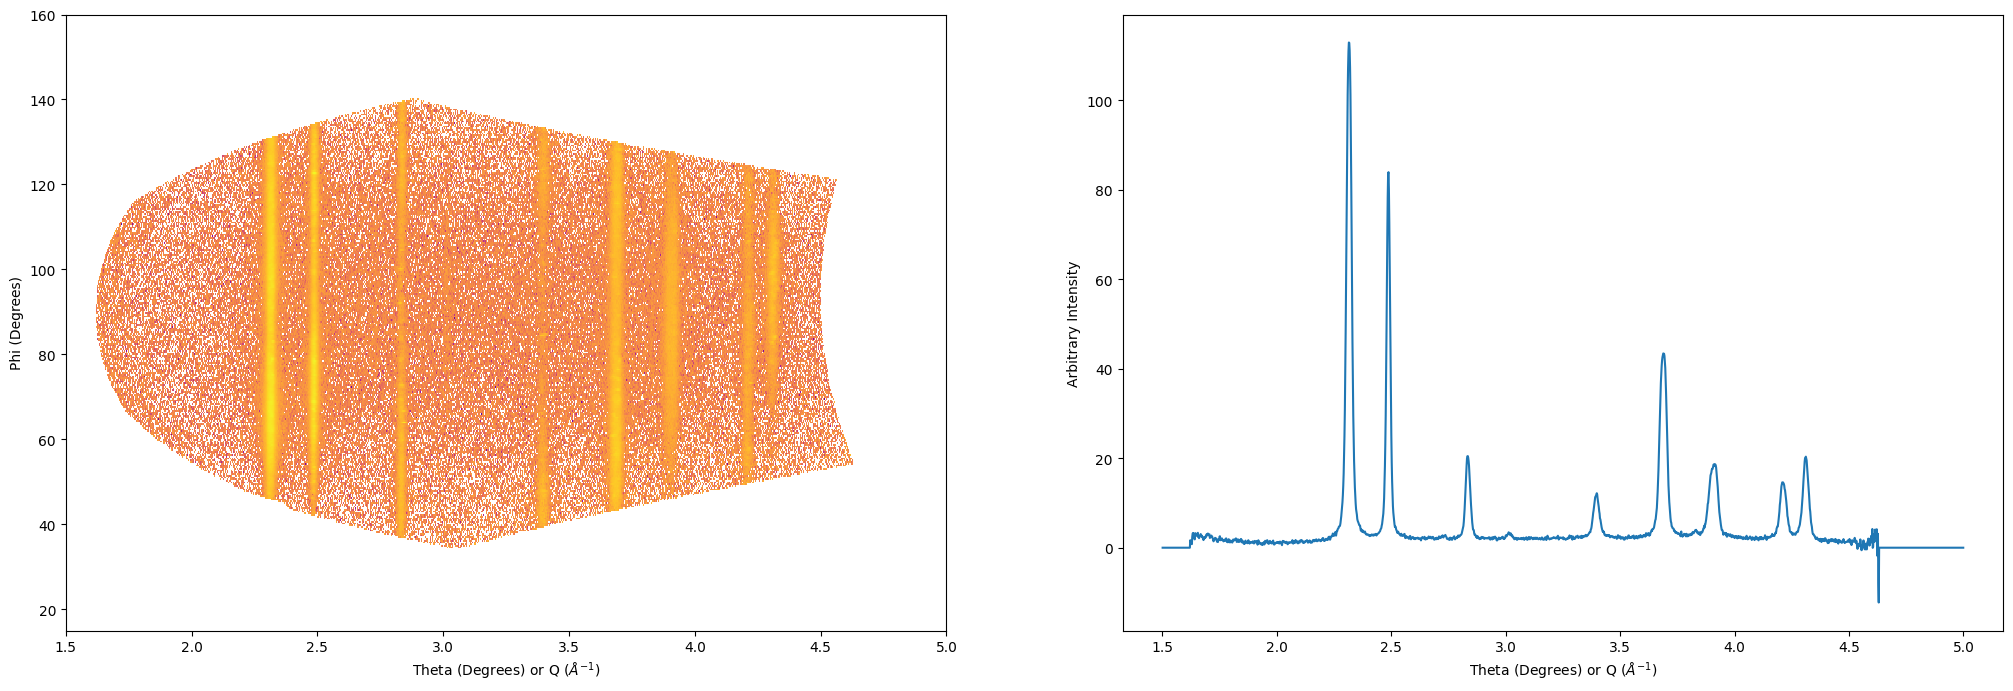

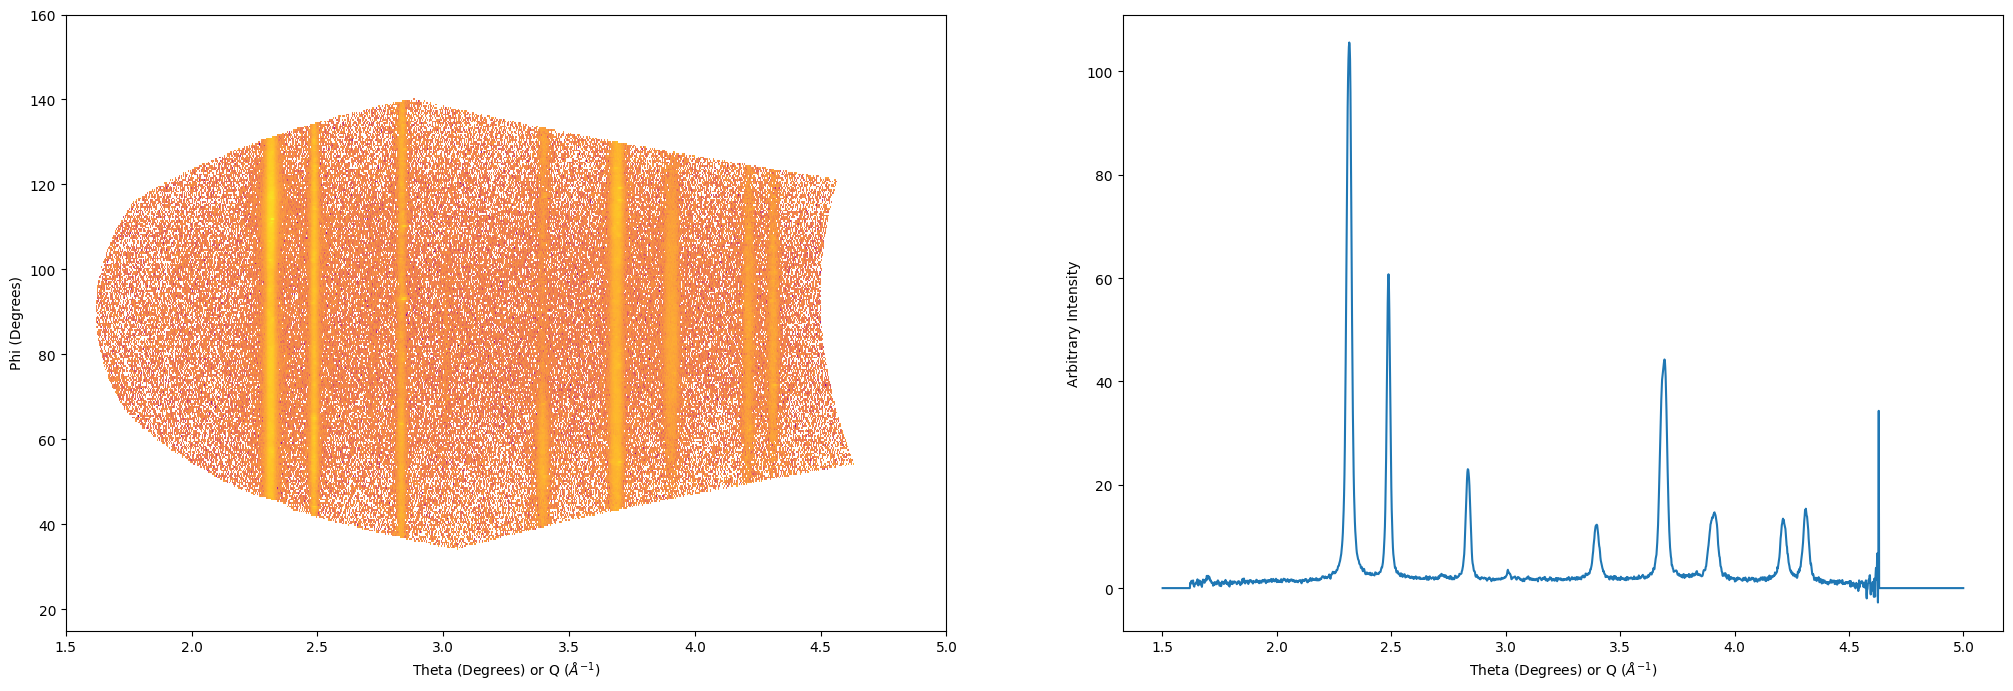

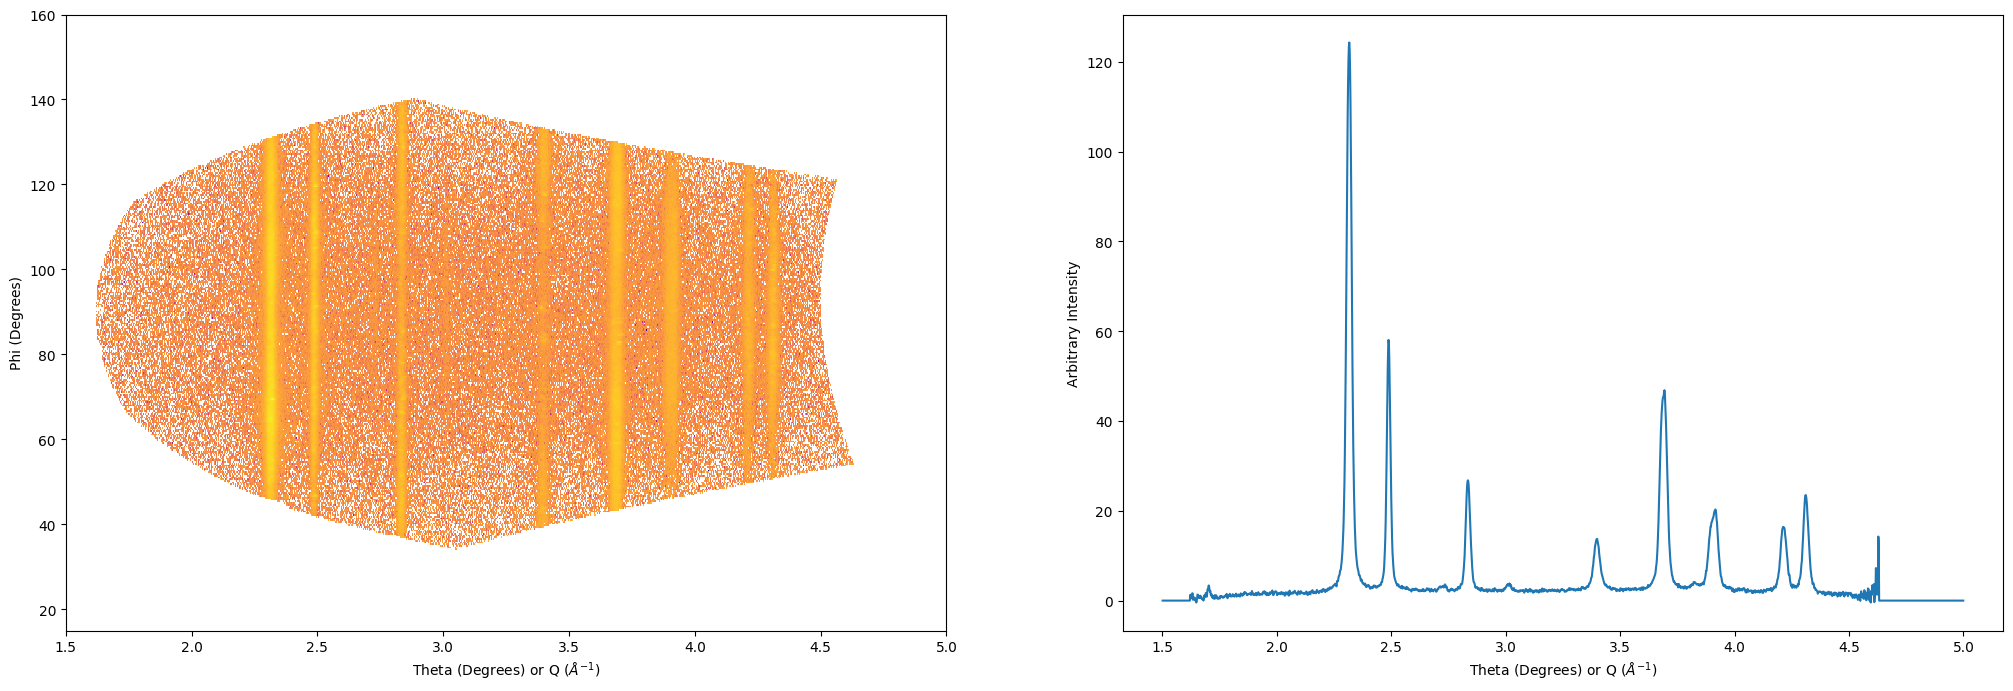

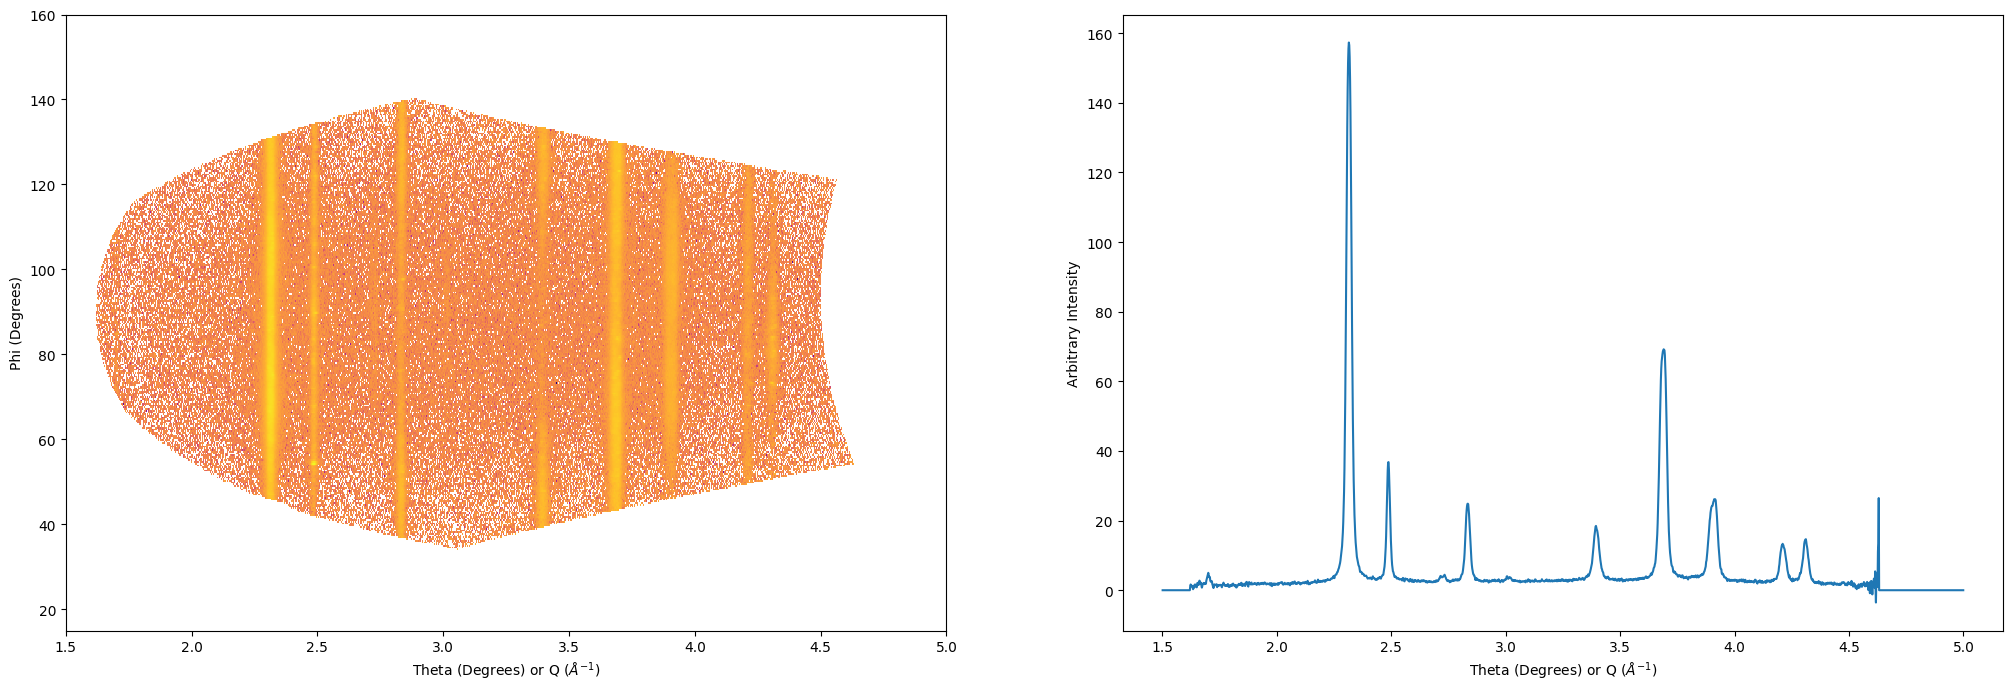

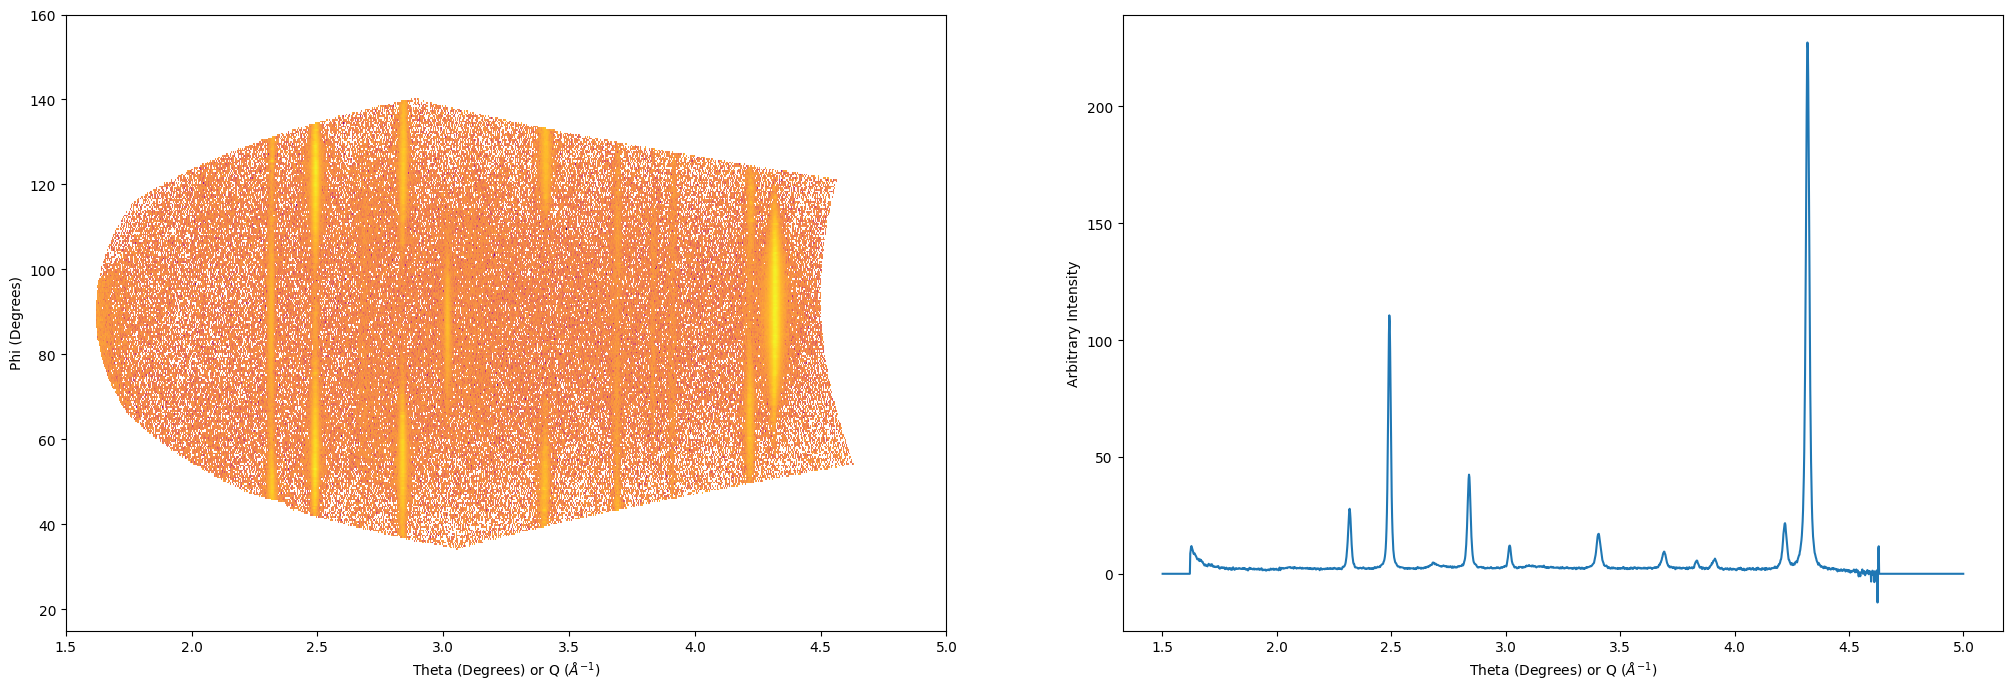

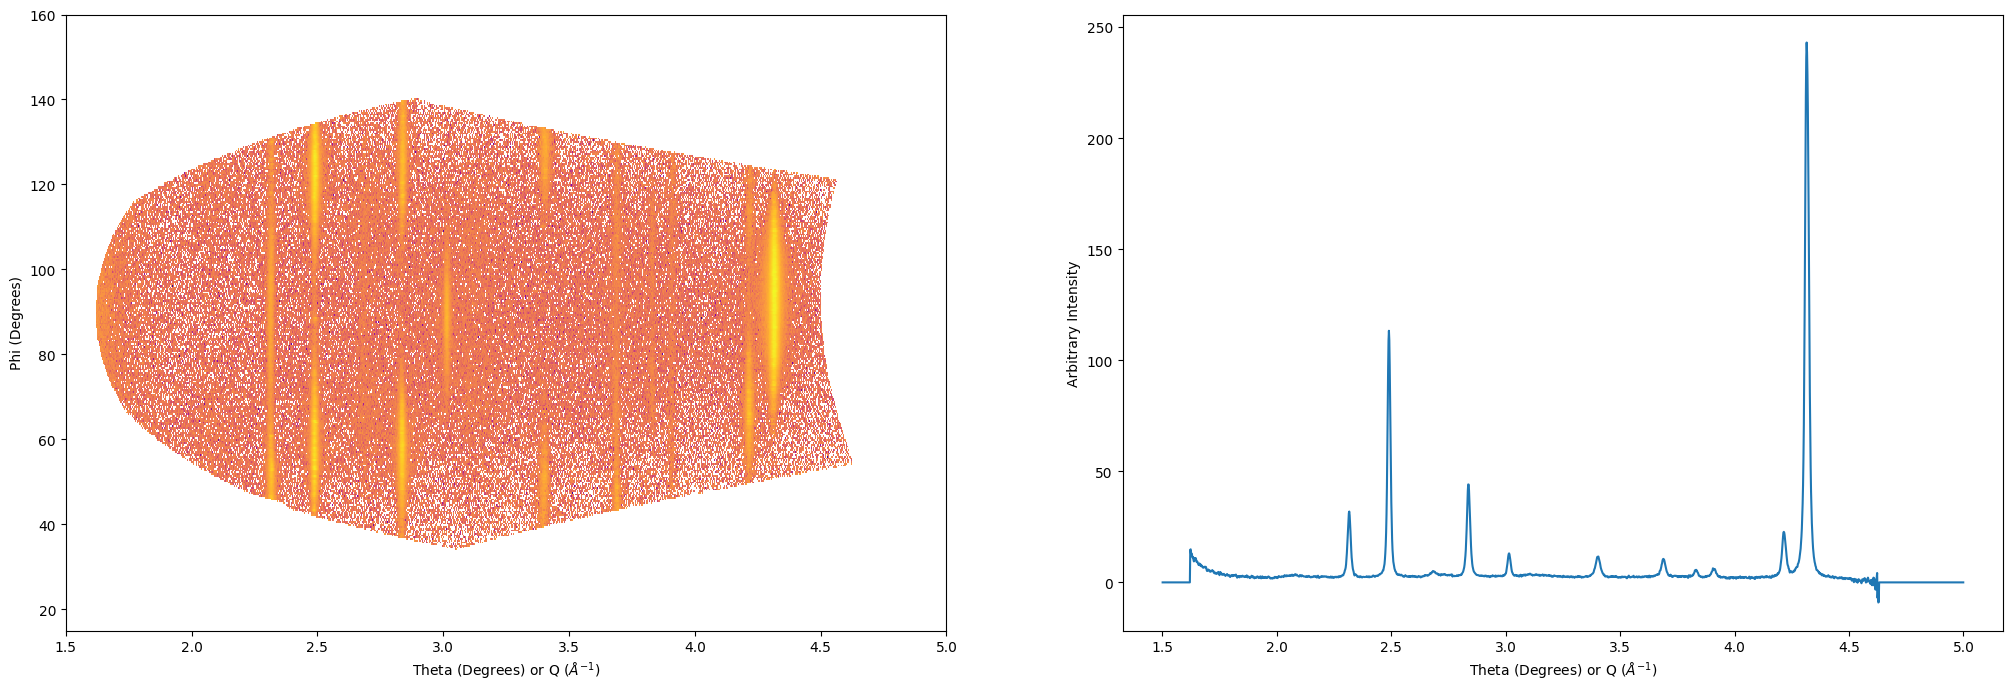

In [27]:
run_numbers = [1620788, 1620789, 1620790, 1620791, 1620792, 1620793]
ims_fpd1 = False
fpd1_INTs = False
export = True
offset = 50
for idx, run_number in enumerate(run_numbers):
    im_fpd1 = get_XRD_image(run_number, plot=False)

    if isinstance(ims_fpd1, bool):
        ims_fpd1 = im_fpd1
    else:
        ims_fpd1 = np.dstack((ims_fpd1, im_fpd1))

    # pyFAI integration for VAREX 1
    fpd1_CAKE = fpd1_PONI.integrate2d_ng(im_fpd1 * fpd1_map, npt_rad, npt_azim, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=True, polarization_factor=1, unit=units, mask=fpd1_mask)
    fpd1_INT = fpd1_PONI.integrate1d_ng(im_fpd1 * fpd1_map, npt_rad, azimuth_range=azim_range, radial_range=radial_range, correctSolidAngle=True, polarization_factor=1, unit=units, mask=fpd1_mask)
    
    plot(fpd1_CAKE, fpd1_INT)

    if isinstance(fpd1_INTs, bool):
        fpd1_INTs = fpd1_INT.intensity + (idx*offset)
    else:
        fpd1_INTs = np.vstack((fpd1_INTs, fpd1_INT.intensity + (idx*offset)))

    if export:
        lineout_exportrun = np.stack((fpd1_INT.radial, fpd1_INT.intensity),axis=1)
        np.savetxt(f'xys/{run_number}.xy',lineout_exportrun)

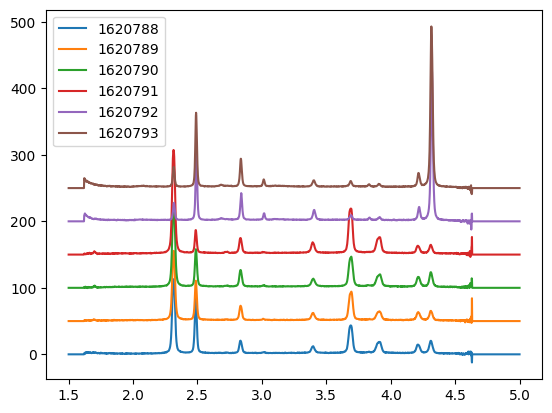

In [28]:
plt.plot(fpd1_INT.radial, np.transpose(fpd1_INTs), label=run_numbers)
plt.legend()